# Linear Regression

* A very simple approach for supervised learning.
* It assumes that the dependence of $Y$ on $X_1, X_2, \dots, X_p$ is linear.
* True regression functions are never linear.
* although it might seem overly simplistic, linear regression is extremely useful both conceptually and practically. 
* Many fancy statistical learning approaches can be seen as generalizations or extensions of linear regression.

## Linear regression for the advertising data

Consider the advertising data in the next picture.

Questions we might ask:

* Is there a relationship between advertising budget and sales?
* How strong is the relationship between advertising budget and sales?
* Which media contribute to sales?
* How accurately can we predict future sales?
* Is the relationship linear?
* Is there synergy among the advertising media

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the advertising data set
f = '../data/Advertising.csv'
# ignore first column
advert = pd.read_csv(f).iloc[:, 1:]
advert.sample(5)

,TV,radio,newspaper,sales
127,80.2,0.0,9.2,8.8
64,131.1,42.8,28.9,18.0
10,66.1,5.8,24.2,8.6
30,292.9,28.3,43.2,21.4
1,44.5,39.3,45.1,10.4


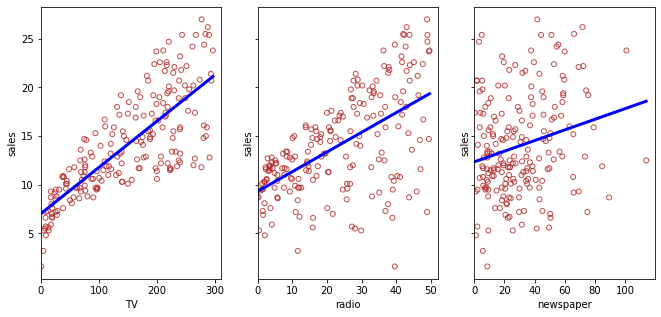

In [3]:
fig, axs = plt.subplots(1, 3, sharey=True,  figsize=(11,5))

for i in range(3):
    sns.regplot(data=advert, y='sales', x=advert.columns[i], 
                ax=axs[i], ci=None,
                line_kws={'color': 'blue', 'lw': 3}, 
                scatter_kws={'edgecolors': 'firebrick', 
                             'facecolors': 'none', 's':25})
    axs[i].set_xlim(xmin=0);

## Simple Linear Regression

* Technically this means we assume that the predictor is linearly related to the response.
* Model: 
    * $Y = \beta_0 + \beta_1X + \epsilon$
    * Where $\beta_0$ and $\beta_1$ are two unknown constants that represent the *intercept* and *slope*. Also known as *coefficients* or *parameters*
    * $\epsilon$ is the error term
    
* Given some estimates $\hat \beta_0$ and $\hat \beta_1 x$ for the model coefficients, we predict future sales using:
    * $\hat y = \hat \beta_0 + \hat \beta_1 x$
    * where $\hat y$ indicates a prediction of $Y$ on the basis of $X = x$
    * The hat symbol denotes an estimated value.

### Estimation of the parameters by least squares

* Let $\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$ be the prediction for $Y$ based on the $i$th value of $X$. Then $e_i = y_i - \hat y_i$ represents the $i$th *residual*
* We define the *residual sum of squares* (RSS) as $$\text{RSS} = e^2_1 + e^2_2 + \dots + e^2_n,$$
* or equivalently as
$$\text{RSS} = (y_1 - \hat \beta_0 - \hat \beta_1x_1)^2 + (y_2 - \hat\beta_0 - \hat\beta_1x_2)^2 +\dots + (y_n-\beta_0-\hat\beta_1x_n)^2$$
* The least squares approach chooses $\hat \beta_0$ and $\hat \beta_1$ to minimize the RSS. The minimizing values can be shown to be:

$$\hat \beta_1 = \frac{\sum^n_{i=1}(x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n(x_i - \bar{x})^2}$$

$$\hat \beta_0 = \bar y - \hat \beta_1 \bar x,$$

* where $\bar{y} \equiv \frac{1}{n}\sum_{i=1}^n y_i$ and $\bar{x} \equiv \frac{1}{n}\sum_{i=1}^n x_i$ are the sample means

### Example: advertising Data

In [18]:
fit = np.polyfit(advert['TV'], advert['sales'], deg=1)
y_hat = fit[1] + advert['TV'] * fit[0]

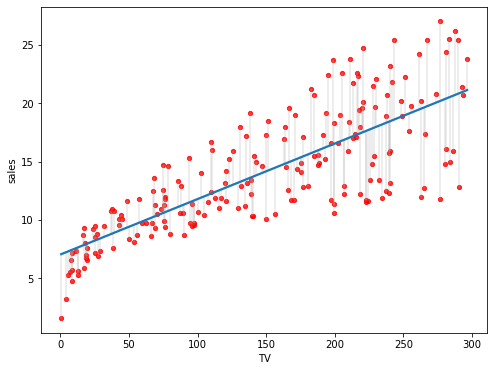

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(data=advert, x='TV', y='sales', ci=False, scatter_kws={'color':'r', 's':18})
plt.vlines(advert['TV'], y_hat, advert['sales'], lw = .4, colors='darkgrey');

In [16]:
fit

array([0.04753664, 7.03259355])

The least squares fit for the regression of `sales` onto `TV`.  
> Many lines can be arbitrary drawn through the advertising data above. Typically the line that minimizes the sum of squared error (also called residual sum of squares (RSS)) between the points and the estimated line is used. But you are free to choose the line of your choice when modeling. Least absolute error, connecting a line through the first and last points, or a hand drawn line are different ways you could model the relationship.

The line above was fitted using numpy's `polyfit` function, with a final model of $\hat Y = 7 + .048X$.  
$\Rightarrow$ For every one unit increase in X a 0.048 increase in sales. Since the data is in thousands, every $\$$1,000 in TV advertising spent correspond to an increase of 48 unit sales!

## How accurate is our estimator?

* The standard error of an estimator reflects how it varies under repeated sampling.
* If we use the sample mean $\hat \mu$ to estimate $\mu$, this estimate is unbiased, in the sense that on average, we expect $\hat \mu$ to equal $\mu$
$$\text{Var}(\hat \mu) = \text{SE}(\hat \mu)^2 = \frac{\sigma^2}{n},$$

* Roughly speaking, the standard error tells us the average amount that this estimate $\hat \mu$ differs from the actual value of $\mu$
 
* These standard errors can be used to compute *confidence intervals*. 
* A 95\% confidence interval is defined as a range of values such that with 95\% probability, the range will contain the true unknown value of the parameter.
* It has the form
$$\hat\beta_1 \pm 2. \text{SE}(\hat\beta_1)$$

* That is, there is approximately a 95\% chance that the interval
$$\big[\hat\beta_1 - 2 . \text{SE}(\hat \beta_1), ~~\hat\beta_1 . \text{SE}(\hat \beta_1)\big]$$
* will contain the true value of $\beta_1$ (under a scenario where we got repeated samples)

## Hypothesis testing

* Standard errors can also be used to perform *hypothesis tests* on the coefficients. 
* The most common hypothesis test involves testing the *null hypothesis* of
    * $H_0$: There is no relationship between $X$ and $Y$ versus the *alternative hypothesis*
    * $H_A$: There is some relationship between $X$ and $Y$
    
* Mathematically, this corresponds to testing:
$$H_0: \beta_1 = 0$$ versus
$$H_A: \beta_1 \neq 0,$$
* Since if $\beta_1 = 0$ then the model reduces to $Y = \beta_0 + \epsilon$, and $X$ is not associated with $Y$

* To test the null hypothesis, we compute a *t-statistic*, given by
$$t = \frac{\hat \beta_1 - 0}{\text{SE}(\hat\beta_1)},$$
* This will have a t-distribution with $n - 2$ degrees of freedom, assuming $\beta_1 = 0$
* Using statistical software, it is easy to compute the probability of observing any value equal to |t| or larger. We call this probability the *p-value*.

### Assessing the Overall Accuracy of the Model

* We compute the *Residual Standard Error*
$$\text{RSE} = \sqrt{\frac{1}{n-2}\text{RSS}} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i - \hat y_i)^2}$$

where the *residual sum-of-squares* is RSS $= \sum_{i=1}^n(y_i-\hat y_i)^2$

* *R-squared* or fraction of variance explained is
$$R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$

where TSS = $\sum_{i=1}^n(y_i - \bar{y})^2$ is the *total sum of squares*.

### Residual Standard Error

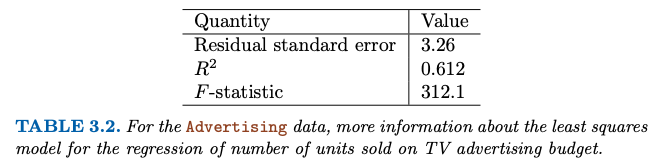

Actual sales in each markt deviate from the true regression line by approximately 3,260 units, on average.
<div class="alert alert-block alert-info">
Another way to think about this is that even if the model were correct and the true values of the unknown coefficients were known exactly, any prediction of sales on the basis of TV advertising would still be off by about 3,260 units on average.</div>

Whether or not 3,260 units is an acceptable prediction error depends on the problem context. In the advertising data set, the mean valued of sales over all markets is around 14,000 units, and so the percentage erro is 3260/14000 = 23%

<div class="alert alert-block alert-warning">
The RSE is considered a measure of the lack of fit of the model to the data.
</div>

## Multiple Linear Regression

* Here our model is: $$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \epsilon$$
* In the advertising example, the model becomes: $$\text{sales} = \beta_0 + \beta1 \times \text{TV} + \beta_2 \times \text{radio} + \beta_3 \times \text{newspaper} + \epsilon$$
* The ideal scenario is when the predictors are uncorrelated:
    * a *balanced design*:
    * Each coefficient can be estimated and tested separately.
    * Interpretations such as *"a unit change in $X_j$ is associated with a $\beta_j$ change in $Y$, while all the other variables stay fixed"*, are possible.
* Correlations among predictors cause problems:
    * The variance of all coefficients tends to increase, sometimes dramatically
    * Interpretations become hazardous -- When $X_j$ changes, everything else changes.
* Claims of causality should be avoided for observational data

## Some important questions

* Is at least one of the predictors $X_1, X_2, \dots, X_p$ useful in predicting the response?
* Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?
* How well does the model fit the data?
* Given a set of predictor values, what response value should we predict, and how accurate is our prediction?


### Is at least one predictor useful?

For the first question, we can use the F-statistic

$$F = \frac{(\text{TSS}-\text{RSS})/p}{\text{RSS}/(n - p - 1)}\sim F_{p,n-p-1}$$

### Deciding on the important variables

We can't examine all possible models, instead we need an automated approach that searches through a subset of them.
Two commonly use approaches:

1. Forward selection:
    * Begin with the *null model* -- a model that contains an intercept but no predictions.
    * Fit $p$ simple linear regressions and add to the null model the variable that results in lowest RSS.
    * Add to that model the variable that results in the lowest RSS amongst all two-variable models
    * Continue until some stopping rule is satisfied. For example, when all remaining variables have a p-value above some threshold.
    
2. Backward selection:
    * Start with all variables in the model.
    * Remove the variable with the largest p-value. That is the variable that is the least statistically significant.
    * The new (p-1)-variable model is fit, and the variable with largest p-value is removed.
    * Continue until a stopping rule is reached. For instance we may stop when all remaining variables have a significant p-value defined by some significance threshold.

## Extension of the linear model

* Removing the additive assumption: *interactions* and *nonlinearity*

Interactions:

* In our previous analysis of the Advertising data, we assumed that the effect on sales of increasing one advertising medium is independent of the amount spent on the other media
* But suppose that spending money on radio advertising actually increases the effectiveness of TV advertising, so that the slope term for TV should increase as radio increases
* In this situation, given a fixed budget of \\$100, 000, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio.
* In marketing, this is known as a *synergy* effect, and in statistics it is referred to as an *interaction* effect.

To do:

* Modeling interactions
* Hierarchy
* interactions between qualitative and quantitative variables
